# National Parks Service Portfolio Project

## Introduction

My goal for this project is to analyze, and visualize the data from the the National Parks Service. The data is bieng provided by `Codecademy` Data Scientist Career Path. Also will give a review in my conclusion of my findings.

### Data Sources

observation.csv: 
   - `scientific_name`: Scientific name of each species
   - `park_name`: National Park where there found
   - `observations`: Number of times each species was sighted the past week


species.csv:
   - `category`: class of animal
   - `scientific_name`: Scientific name of each species
   - `common_name`:common name for that species
   - `conservation_status`: current conservation status by species


### Goals

 - Inspect and Clean each dataset
 - Look at the observations distrubtions
 - Which species was spotted the most by National_park
 - Analyze the the conservation status compared to the species

#### Import all the modules

In [31]:
# import all the modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import and inspect data

In [32]:
obs = pd.read_csv("observations.csv")
spec = pd.read_csv("species_info.csv")
print(obs.columns)
print(spec.columns)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


#### Observations Dataset

Using the `.head()` on the `DataFrame` to display first (5) rows

In [33]:
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


##### Shape of observation dataset

In [34]:
print(f"observations shape: {obs.shape}")

observations shape: (23296, 3)


#### Looking at the sum of National parks/ their names

In [35]:
print(f"Total number of National Parks: {obs.park_name.nunique()}")
print(f"National Park Names: {obs.park_name.unique()}")

Total number of National Parks: 4
National Park Names: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


#### Number of observations/ unique scientific names

In [36]:
print(f"Total number of observations: {obs.observations.sum()}")

Total number of observations: 3314739


In [37]:
print(f"Unique scientific names: {obs.scientific_name.nunique()}")

Unique scientific names: 5541


#### Observation by park

In [38]:
park_obs = obs.groupby("park_name").sum("observations").reset_index()
park_obs.columns = ["National parks","Observations"]
park_obs.Observations = pd.to_numeric(park_obs.Observations)
park_obs

,National parks,Observations
0,Bryce National Park,576025
1,Great Smoky Mountains National Park,431820
2,Yellowstone National Park,1443562
3,Yosemite National Park,863332


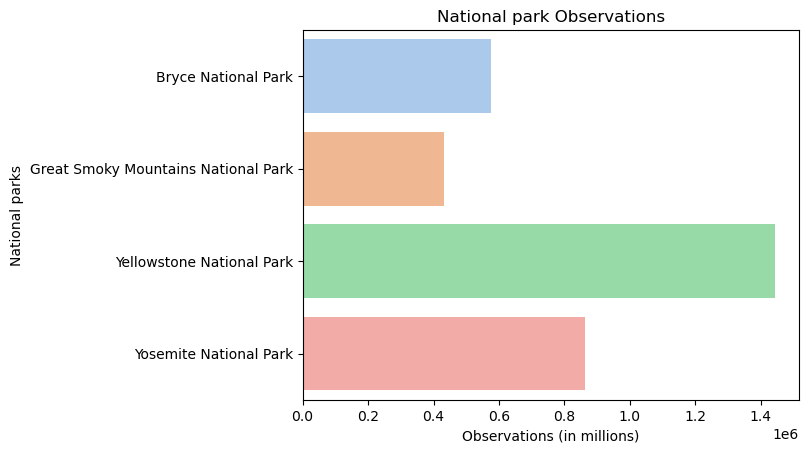

In [39]:
sns.barplot(data = park_obs, x="Observations",y="National parks")
plt.title("National park Observations")
plt.xlabel("Observations (in millions)")
plt.show()

#### Distributions of Observations

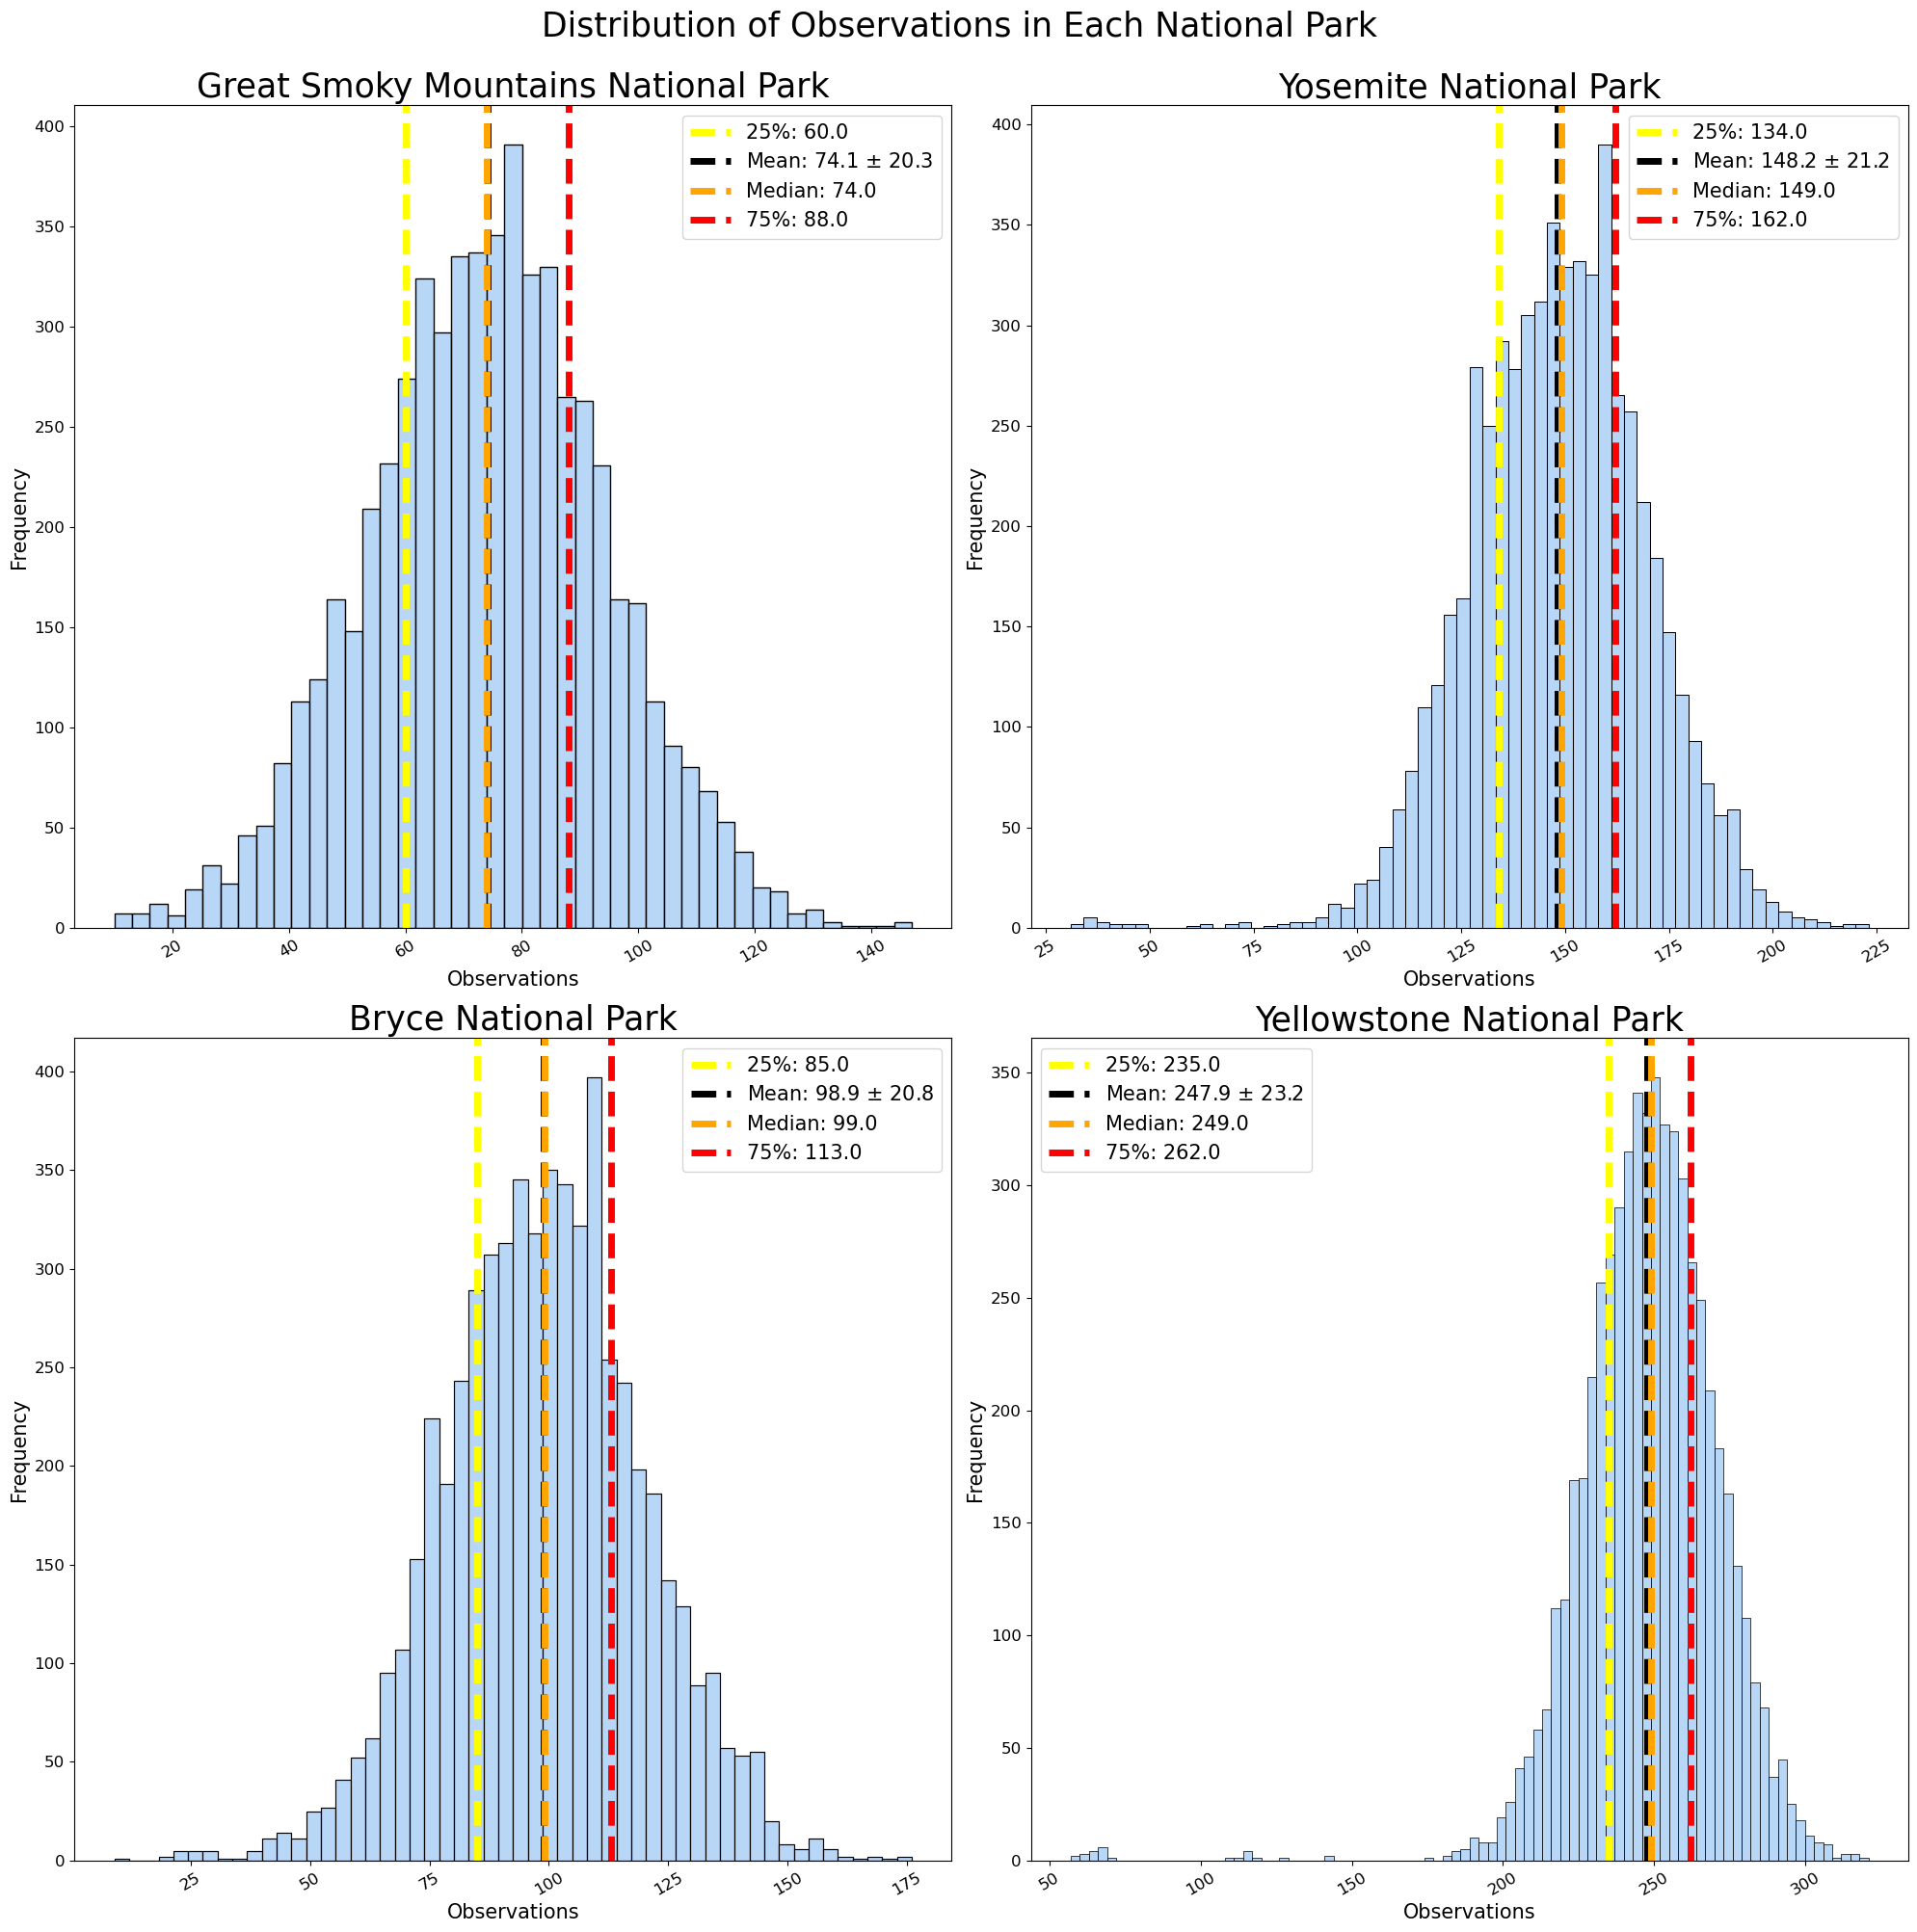

In [40]:
plt.figure(figsize = (20,20))
for i in range(len(obs.park_name.unique())):
    plt.subplot(2,2,i+1)
    hist_df = obs[obs.park_name == obs.park_name.unique()[i]]
    plot = sns.histplot(x = 'observations', data = hist_df)
    plt.axvline(np.percentile(hist_df.observations, 25), color =  'yellow', linestyle = '--', linewidth = 5,
                label = '25%: {}'.format(np.percentile(hist_df.observations, 25)))
    plt.axvline(hist_df.observations.mean(), color =  'black', linestyle = '--', linewidth = 5,
                label = r'Mean: {mean:.1f} $\pm$ {std:.1f}'.format(mean = hist_df.observations.mean(),
                                                                  std = hist_df.observations.std()))
    plt.axvline(hist_df.observations.median(), color =  'orange', linestyle = '--', linewidth = 5,
                label = 'Median: {}'.format(hist_df.observations.median()))
    plt.axvline(np.percentile(hist_df.observations, 75), color =  'red', linestyle = '--', linewidth = 5,
                label = '75%: {}'.format(np.percentile(hist_df.observations, 75)))
    plt.xlabel('Observations', fontsize = 15)
    plt.xticks(fontsize = 12, rotation = 30)
    plt.ylabel('Frequency', fontsize = 15)
    plt.yticks(fontsize = 12)
    plt.title(obs.park_name.unique()[i], fontsize = 25)
    plt.legend(fontsize = 15)
    
plt.suptitle('Distribution of Observations in Each National Park', fontsize = 25, y = 1.00)
plt.tight_layout()
plt.savefig('bio.pdf')
plt.show()
    

Each park shows a normal distribution. Yellowstone has a small right tail.The Std and IQRs ae comstant from park to park. If I had to guess maybe outside factors that influence the data for example the park size or the population surronding each park.

#### Species dataset

In [41]:
spec.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [42]:
print(f"species shape: {spec.shape}")

species shape: (5824, 4)


##### Number of unique categorys

In [43]:
print(f"Total number of categories: {spec.category.nunique()}")
print(f"Unique categories: {spec.category.unique()}")

Total number of categories: 7
Unique categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


##### Most freq category

In [44]:
cate = spec.groupby("category").size().sort_values(ascending = False).reset_index()
cate.columns = ["Category" , "Count"]
cate

,Category,Count
0,Vascular Plant,4470
1,Bird,521
2,Nonvascular Plant,333
3,Mammal,214
4,Fish,127
5,Amphibian,80
6,Reptile,79


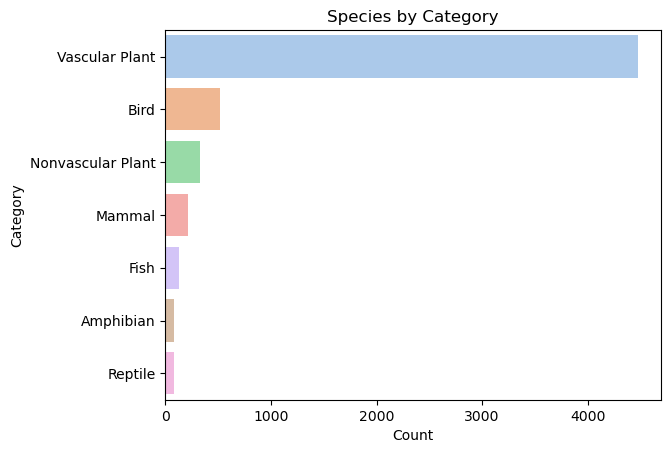

In [45]:
sns.barplot(data=cate,x="Count",y="Category")
plt.title("Species by Category")
plt.show()

Vascualar Plant is the most frequent while reptile is the least by a small margin of Amphibian.


##### Conservation Status

Now I am going to analyze the conservation status. Looking at the head there is already alot of nulls but as I take a closer look I see it can also be interpret as `Non Endangered`.

In [46]:
spec.conservation_status.fillna("Non Endangered", inplace = True)
spec.conservation_status.value_counts()


Non Endangered        5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

In [47]:
non_e = spec[spec.conservation_status == "Non Endangered"]
print(f'Pecrntage of Non Endangered %{(100 -(len(spec) - len(non_e))/100)}')

Pecrntage of Non Endangered %98.09


In [48]:
spec['conservation_status'] = pd.Categorical(spec.conservation_status, ['Non Endangered','Species of Concern','Threatened','Endangered','In Recovery'], ordered=True)
conservation_c = spec[spec.conservation_status != "Non Endangered"]\
        .groupby(["conservation_status", "category"])["scientific_name"].count().unstack()
conservation_ca = conservation_c.drop(['Non Endangered'])
conservation_ca


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Species of Concern,4,72,4,28,5,5,43
Threatened,2,0,4,2,0,0,2
Endangered,1,4,3,7,0,0,1
In Recovery,0,3,0,1,0,0,0


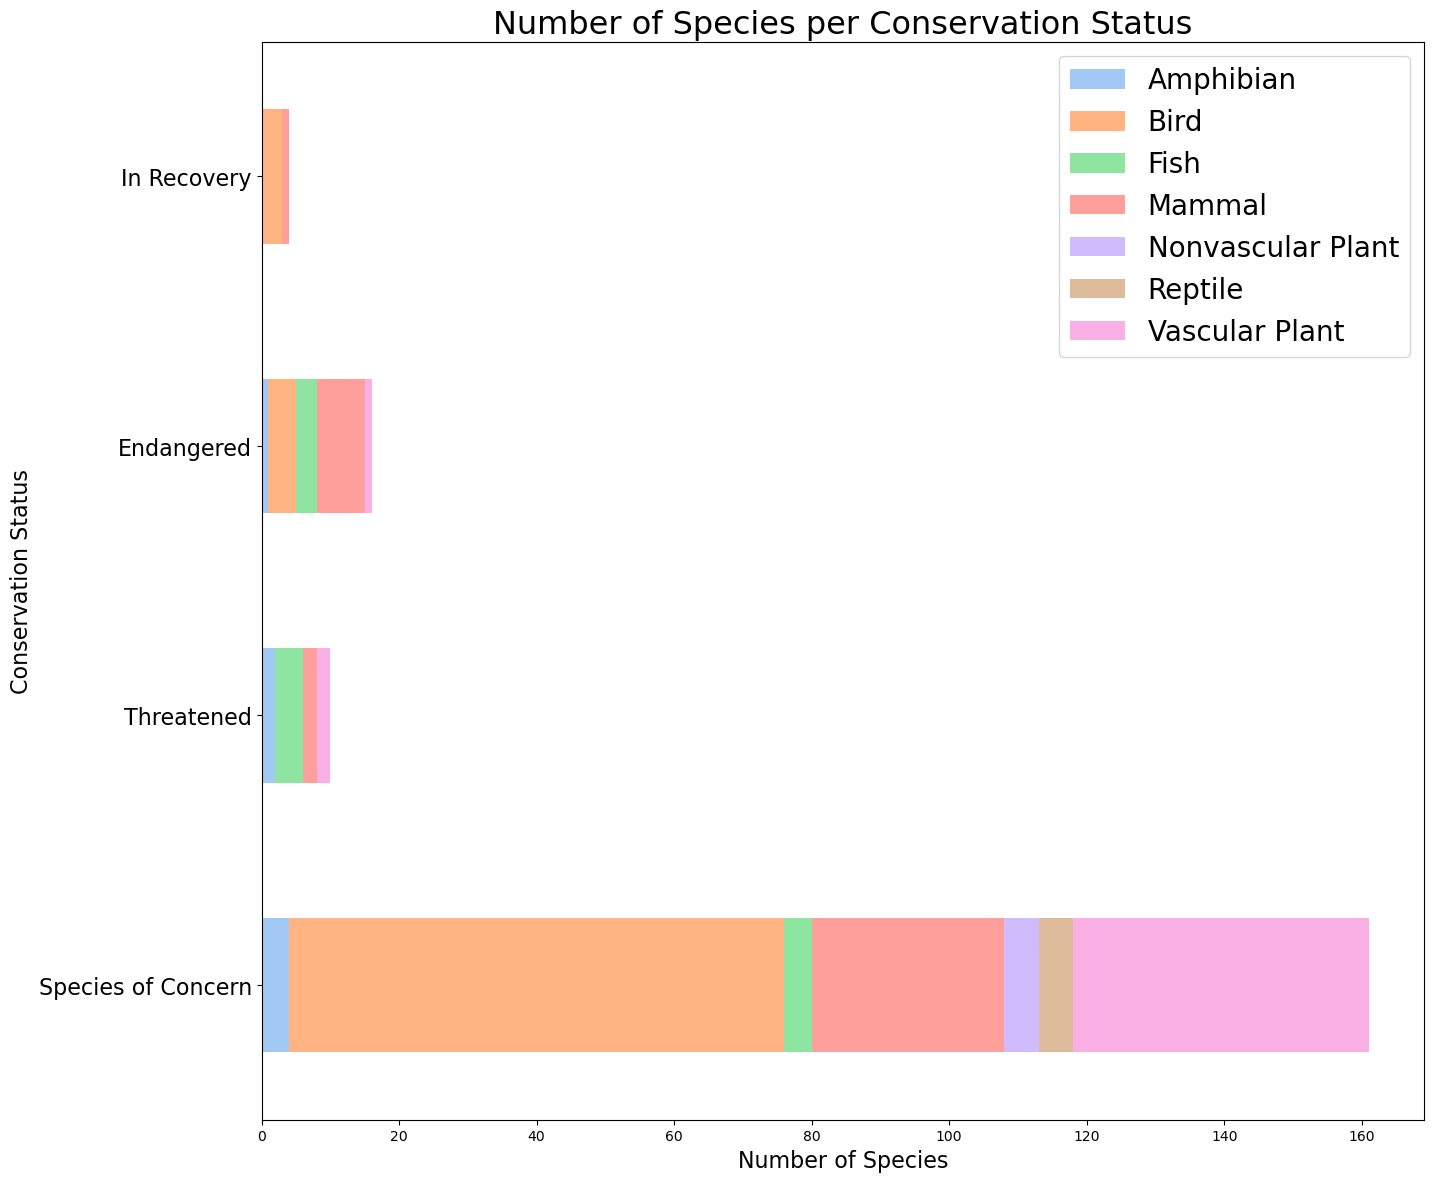

In [49]:
sns.set_palette("pastel")
status = ['Species of Concern','Threatened','Endangered','In Recovery']
ax = conservation_ca.plot(kind="barh",figsize=(15,14),stacked=True)
ax.set_ylabel("Conservation Status", fontsize=16)
ax.set_xlabel("Number of Species", fontsize=16)
ax.set_yticklabels(status,fontsize=16)
plt.title("Number of Species per Conservation Status", fontsize=23)
plt.legend(fontsize=20)
plt.show()
plt.close()

#### Why its important?


Now, I will add a column `protection` to see which species is protected. I will take the `Non Endangered` from conservation_status.\
`False` means the species is not protected while `True` means it is protected.

In [50]:
spec['Protection'] = spec.conservation_status != "Non Endangered"
spec.head()

,category,scientific_name,common_names,conservation_status,Protection
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Non Endangered,False
1,Mammal,Bos bison,"American Bison, Bison",Non Endangered,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Non Endangered,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Non Endangered,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Non Endangered,False


,category,not protected,protected,percent_protected
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


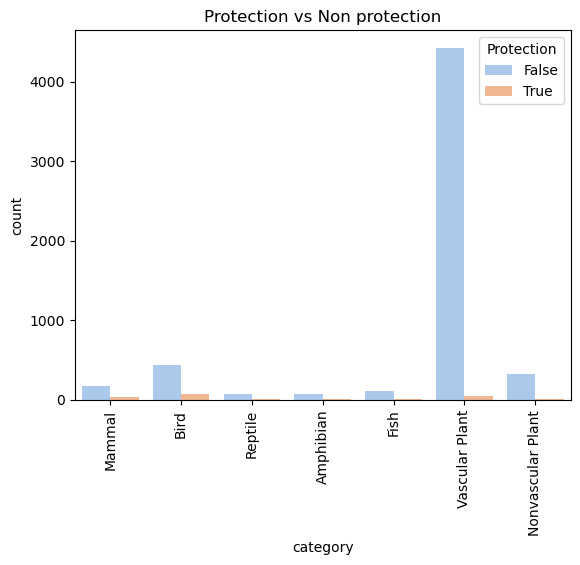

In [51]:
pcount = spec.groupby(["category", "Protection"]).scientific_name.nunique()\
        .reset_index().pivot(columns = "Protection", index = "category", values = "scientific_name")\
        .reset_index()

pcount.columns = ["category", "not protected", "protected"]


pcount["percent_protected"] = round(pcount.protected / \
        (pcount.protected + pcount['not protected']) * 100, 2)
display(pcount)
ax = sns.countplot(x="category",data=spec,hue="Protection",saturation=0.75)
plt.title("Protection vs Non protection")
plt.xticks(rotation=90)
plt.show()

The objective of the examination is to determine the relationship between two variables. The initial test, referred to as contingency1, will utilize `Mammal` and `Bird` values. The `Chi-Square` test will be conducted with an alpha value of `0.05`. If the resulting p-value is higher than the alpha value, it will indicate that the Null Hypothesis below is true. Conversely, if the p-value is lower than the alpha value, the Null Hypothesis will be rejected, and the Alternative Hypothesis will be more consistent with the observations.

`Null Hypothesis`: There is no correlation between the conservation status of a species and its species classification.

`Alternative Hypothesis`: There is a significant correlation between the conservation status of a species and its species classification.

In [52]:
from scipy.stats import chi2_contingency

contingency1 = [[146, 30],
                [413, 75]]

alpha = 0.05

stat, p, dof, expected = chi2_contingency(contingency1)

print("p-value is: " + str(p))
if p <= alpha:
    print("Dependent (reject null hypothesis)")
else:
    print("Independent (null hypothesis holds true)")

p-value is: 0.6875948096661336
Independent (null hypothesis holds true)


Now I will do the same on `Vascular Plant` vs `NonVascular plant`.

In [53]:
contingency1 = [[328, 5],
                [4216, 36]]

alpha = 0.05

stat, p, dof, expected = chi2_contingency(contingency1)

print("p-value is: " + str(p))
if p <= alpha:
    print("Dependent (reject null hypothesis)")
else:
    print("Independent (null hypothesis holds true)")

p-value is: 0.3574882715157678
Independent (null hypothesis holds true)


## Combine the Data sets to figure out the species per park

First I am going to drop the duplicates of `scientific_name` column becasue it had `5824` rows while only having `5541` unique names.
Will use `.drop_duplicates()` on `scientific_name`.

In [54]:
sc_name = spec.drop_duplicates(subset = ["scientific_name"])
sc_name

,category,scientific_name,common_names,conservation_status,Protection
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Non Endangered,False
1,Mammal,Bos bison,"American Bison, Bison",Non Endangered,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Non Endangered,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Non Endangered,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Non Endangered,False
...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,Non Endangered,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",Non Endangered,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",Non Endangered,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",Non Endangered,False


Then I am going to drop all the rows except `category` and `scientific_name`.

In [55]:
sc_name = sc_name.drop(["common_names","conservation_status","Protection"], axis = 1)
sc_name

,category,scientific_name
0,Mammal,Clethrionomys gapperi gapperi
1,Mammal,Bos bison
2,Mammal,Bos taurus
3,Mammal,Ovis aries
4,Mammal,Cervus elaphus
...,...,...
5819,Vascular Plant,Solanum parishii
5820,Vascular Plant,Solanum xanti
5821,Vascular Plant,Parthenocissus vitacea
5822,Vascular Plant,Vitis californica


Now to Merge the datasets!


In [56]:
sc_obs = obs.merge(sc_name)
display(sc_obs)
print(f"Sum:3314739 observations")

,scientific_name,park_name,observations,category
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal
...,...,...,...,...
23291,Gulo gulo,Yosemite National Park,157,Mammal
23292,Dichanthelium depauperatum,Great Smoky Mountains National Park,88,Vascular Plant
23293,Dichanthelium depauperatum,Bryce National Park,80,Vascular Plant
23294,Dichanthelium depauperatum,Yellowstone National Park,255,Vascular Plant


Sum:3314739 observations


In [57]:
count_park = sc_obs.groupby(["park_name", "category"]).sum("observations").reset_index()

count_park

,park_name,category,observations
0,Bryce National Park,Amphibian,7380
1,Bryce National Park,Bird,51647
2,Bryce National Park,Fish,12423
3,Bryce National Park,Mammal,20550
4,Bryce National Park,Nonvascular Plant,32992
5,Bryce National Park,Reptile,7950
6,Bryce National Park,Vascular Plant,443083
7,Great Smoky Mountains National Park,Amphibian,5707
8,Great Smoky Mountains National Park,Bird,37728
9,Great Smoky Mountains National Park,Fish,9206


In [58]:
spec_count = count_park.pivot(columns= "category", index = "park_name", values = "observations").reset_index()
spec_count.columns = ["Park Name", "Amphibian", "Bird", "Fish", "Mammal", "Nonvascular Plant", "Reptile", "Vascular Plant"]
spec_count


,Park Name,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
0,Bryce National Park,7380,51647,12423,20550,32992,7950,443083
1,Great Smoky Mountains National Park,5707,37728,9206,15012,24857,5691,333619
2,Yellowstone National Park,19440,127251,30574,50795,83021,19554,1112927
3,Yosemite National Park,11444,76207,18615,30339,49783,11483,665461


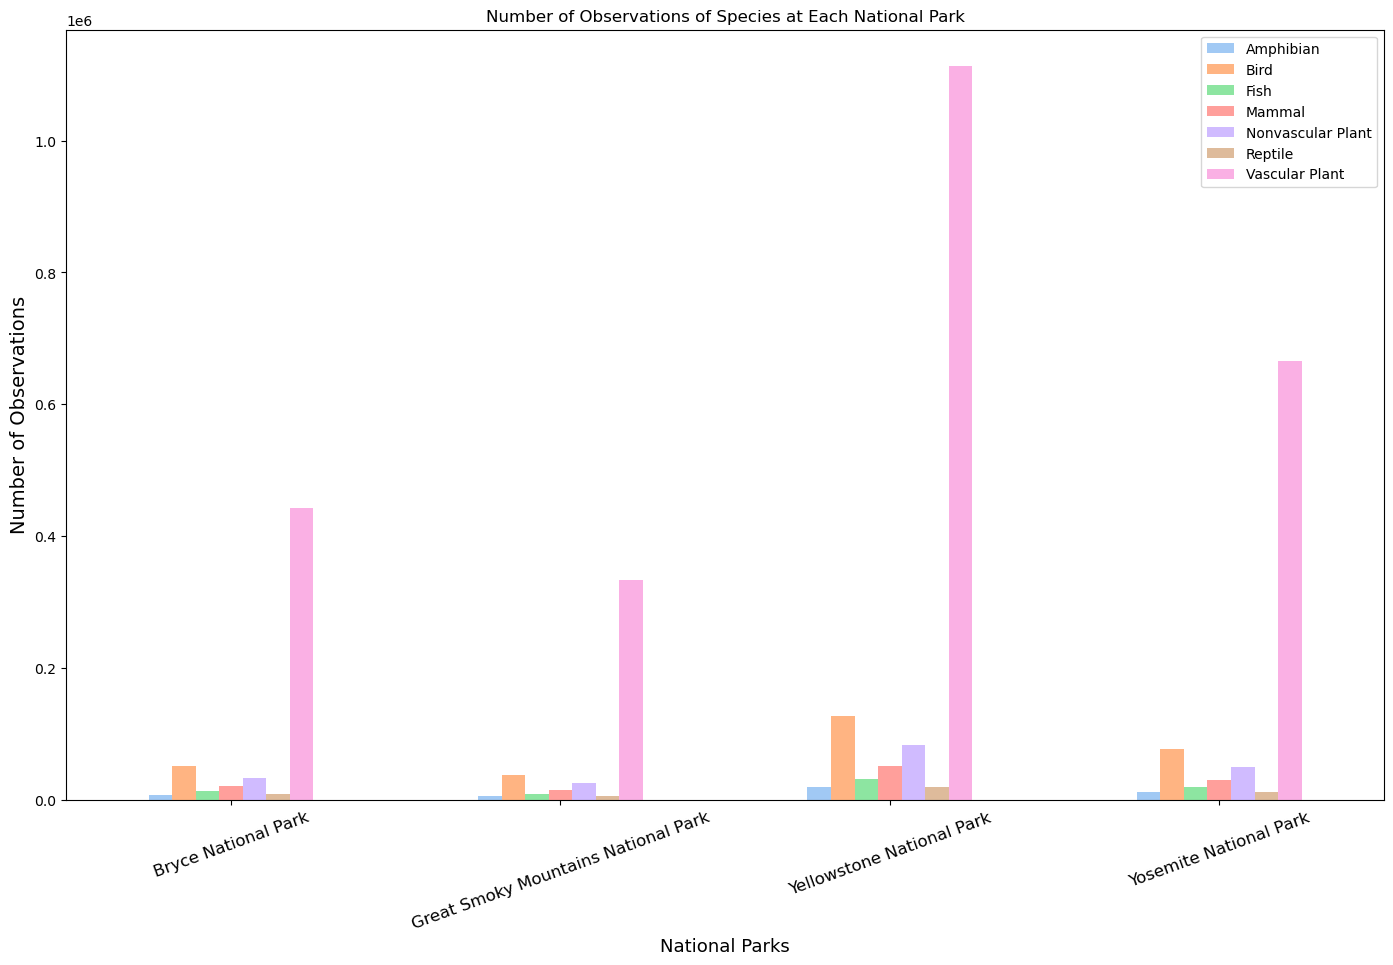

In [59]:
ax = spec_count.plot(kind = "bar", figsize = (17, 10), stacked = False)
ax.set_xticks(range(len(spec_count["Park Name"])))
ax.set_xticklabels(spec_count["Park Name"], fontsize = 12, rotation = 20)
ax.set_xlabel("National Parks", fontsize = 13)
ax.set_ylabel("Number of Observations", fontsize = 14)
plt.title("Number of Observations of Species at Each National Park")
plt.show()
plt.close()

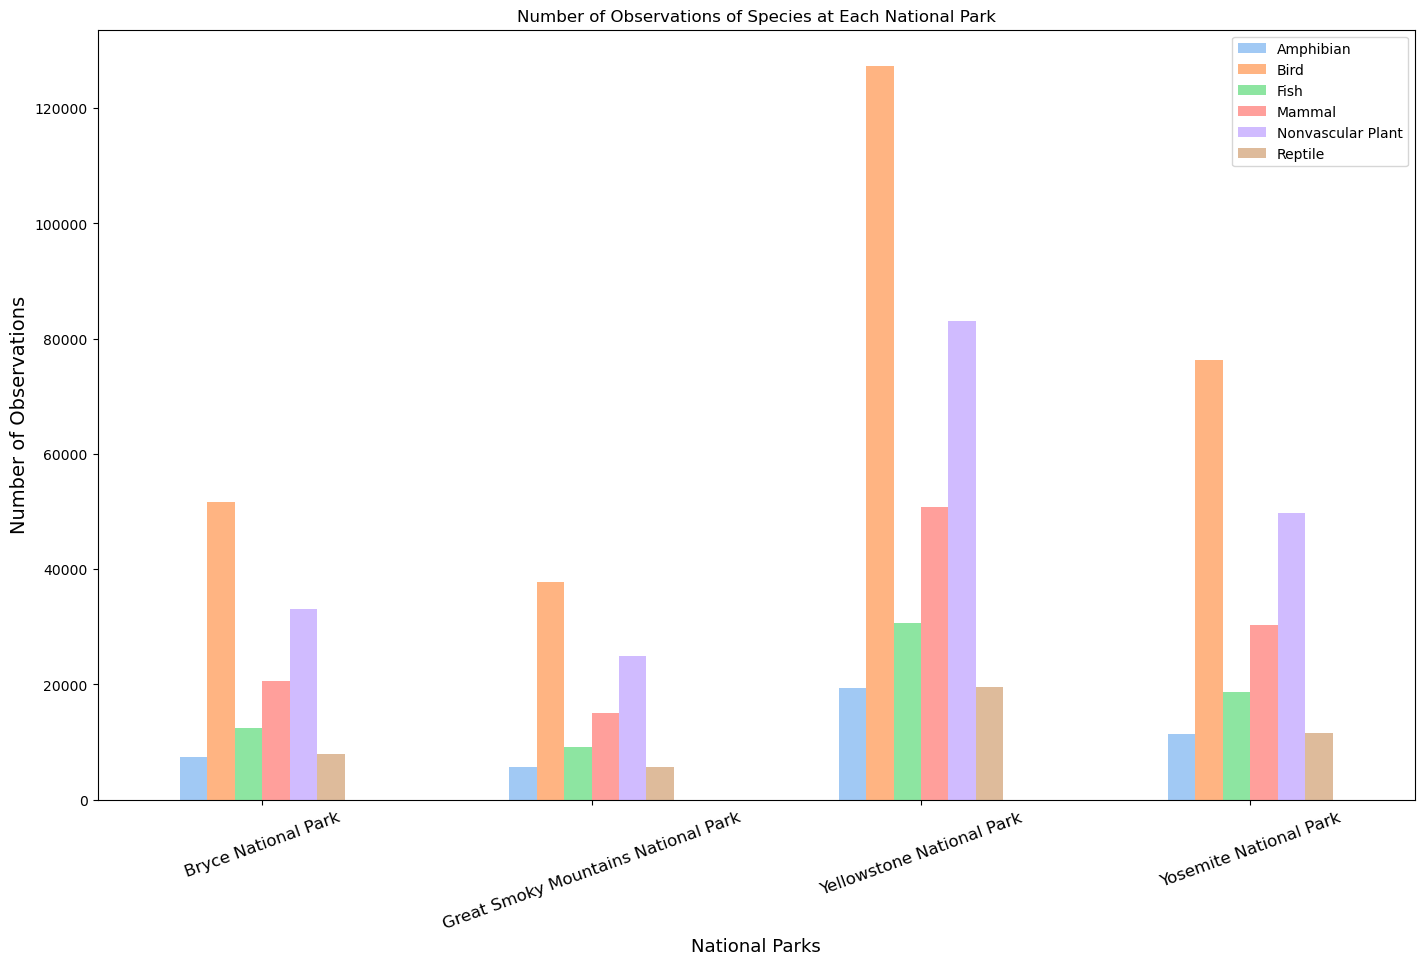

In [60]:
spec_count2 = spec_count.drop(["Vascular Plant"], axis=1)
ax = spec_count2.plot(kind = "bar", figsize = (17, 10), stacked = False)
ax.set_xticks(range(len(spec_count2["Park Name"])))
ax.set_xticklabels(spec_count2["Park Name"], fontsize = 12, rotation = 20)
ax.set_xlabel("National Parks", fontsize = 13)
ax.set_ylabel("Number of Observations", fontsize = 14)
plt.title("Number of Observations of Species at Each National Park")
plt.show()
plt.close()

## Conclusion

#### By conducting an analysis of this project, numerous data visualizations were created, facilitating a better understanding of the conservation status of the various species present in the data sets. Additionally, the project aimed to answer the following questions:

 
#### What are the observation Distributions?

    - Each park exhibits a normal distribution, with Yellowstone showing a slight right tail. The standard deviation and interquartile ranges remain consistent across all parks. Based on these observations, it is possible that external factors such as park size or the surrounding population may be influencing the data.
    - Out of the total number of species present in the dataset, a relatively small proportion (191) were found to have some form of conservation status. The majority of the species (5,633) did not have any conservation status. Birds, vascular plants, and mammals were the three most common categories of species with a conservation status.

#### Are certain types of species more likely to need conservation?

    - Upon analyzing the count of species with and without conservation status, I was able to calculate the percentages for each category. Among the species with conservation status, mammals (17.05%) and birds (15.37%) had the highest proportion of individuals protected through conservation efforts.



#### Are the differences between species and their conservation status significant?:

    - Two Chi-Squared tests were conducted to assess the significance of conservation status between different species categories. The results indicated that there was no significant difference in conservation percentages between mammals and birds, but there was a significant difference in conservation status between mammals and reptiles.

#### Which species was spotted the most by National_park?

    - After grouping the species by category and national park, it was found that vascular plants were the most commonly observed species at each park, followed by birds and nonvascular plants. Yellowstone National Park had the highest number of species observations.
